**Name:** \_\_\_\_\_ 

**EID:** \_\_\_\_\_ 

# CS5489 - Tutorial 2
## Text Document Classification with Naive Bayes

In this tutorial you will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [51]:
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats, special
random.seed(100)

Next, put the file "20news-bydate_py3.pkz' into the same directory as this ipynb file. **Do not unzip the file.**

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [52]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats      = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats, data_home='./')
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats, data_home='./')

Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [53]:
print("training set size:", len(newsgroups_train.data))
print("testing set size: ",  len(newsgroups_test.data))
print(newsgroups_train.target_names)

training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [54]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))

class counts
alt.atheism         : 480
comp.graphics       : 584
sci.space           : 593
talk.religion.misc  : 377


Now have a look at the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [55]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(
        i, newsgroups_train.target_names[newsgroups_train.target[i]]))
    print(newsgroups_train.data[i])

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

**Tip:** while you do the tutorial, it is okay to make additional code cells in the file.  This will allow you to avoid re-running code (like training a classifier, then testing a classifier).

### Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [56]:
# pull out the document data and labels
traindata = newsgroups_train.data
trainY = newsgroups_train.target

testdata = newsgroups_test.data
testY  = newsgroups_test.target

In [57]:
### INSERT YOUR CODE HERE

In [58]:
cntvect = feature_extraction.text.CountVectorizer(stop_words="english",max_features=2000)

cntvect.fit(traindata)

print(cntvect.vocabulary_)

trainX=cntvect.transform(traindata)
testX=cntvect.transform(testdata)
# convert to sparse matrix 
trainX= trainX.toarray()
print(trainX)


{'hi': 828, 've': 1901, 'save': 1588, 'model': 1151, 'mapping': 1088, 'planes': 1344, 'file': 689, 'given': 762, 'default': 490, 'position': 1368, 'positions': 1369, 'does': 555, 'know': 964, 'information': 891, 'stored': 1735, 'explicitly': 648, 'said': 1580, 'manual': 1086, 'saving': 1589, 'rules': 1572, 'like': 1018, 'able': 76, 'read': 1482, 'rule': 1571, 'format': 714, 'available': 219, 'evidence': 626, 'contrary': 425, 'koresh': 969, 'simply': 1660, 'thought': 1824, 'bunch': 285, 'folks': 704, 'children': 340, 'jim': 931, '1993': 26, 'evil': 627, 'article': 181, 'com': 370, 'mark': 1092, 'figure': 688, 'unlikely': 1878, 'actually': 97, 'sorry': 1682, 'used': 1883, 'talking': 1780, 'language': 975, 'couldn': 443, 'just': 947, 'say': 1591, 'request': 1532, 'respond': 1543, 'challenges': 327, 'mail': 1070, 'appear': 152, 'quite': 1462, 'clear': 358, 'mr': 1176, 'continue': 419, 'post': 1374, 'articles': 182, 'postings': 1377, 'noted': 1215, 'posts': 1378, 'single': 1663, 'challenge'

###  Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [59]:
### INSERT YOUR CODE HERE

In [60]:
bmodel = naive_bayes.BernoulliNB(alpha=0.2)
bmodel.fit(trainX,trainY)

predY= bmodel.predict(testX)
metrics.accuracy_score(predY,testY)

0.6770140428677014

What are the most important (frequent) words for each category?  Run the below code.

Note: `model.feature_log_prob_[i]` will index the word log-probabilities for the i-th class

In [61]:
# get the word names
fnames = asarray(cntvect.get_feature_names_out())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.feature_log_prob_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], bmodel.feature_log_prob_[i][t]))

class alt.atheism
    time      (-1.80264)
    know      (-1.60819)
    does      (-1.60819)
    god       (-1.58761)
    like      (-1.54769)
    say       (-1.52831)
    just      (-1.45434)
    think     (-1.39382)
    people    (-1.29790)
    don       (-1.18964)
class comp.graphics
    just      (-1.94934)
    don       (-1.91392)
    program   (-1.87970)
    need      (-1.85753)
    does      (-1.74365)
    use       (-1.73392)
    like      (-1.60670)
    know      (-1.50922)
    graphics  (-1.49386)
    thanks    (-1.47125)
class sci.space
    earth     (-1.90626)
    use       (-1.88384)
    time      (-1.76877)
    know      (-1.73001)
    think     (-1.73001)
    nasa      (-1.73001)
    don       (-1.69269)
    just      (-1.47174)
    like      (-1.41467)
    space     (-1.01896)
class talk.religion.misc
    say       (-1.65387)
    way       (-1.62654)
    like      (-1.61315)
    does      (-1.53639)
    know      (-1.48830)
    think     (-1.42025)
    god       (-1.377

### Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [62]:
### INSERT YOUR CODE HERE

In [63]:
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True,norm="l1")
trainXtf = tf_trans.fit_transform(trainX)
testXtf= tf_trans.fit_transform(testX)
print('TF_IDF data')
trainXtf = trainXtf.toarray()
print(trainXtf)

mmodel_tf = naive_bayes.MultinomialNB(alpha=0.2)
mmodel_tf.fit(trainXtf,trainY)

predYtf = mmodel_tf.predict(testXtf)
metrics.accuracy_score(predYtf,testY)


TF_IDF data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


0.6881005173688101

What are the most important features for Multinomial model? Run the below code.

In [64]:
# get the word names
fnames = asarray(cntvect.get_feature_names_out())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.feature_log_prob_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], mmodel_tf.feature_log_prob_[i][t]))

class alt.atheism
    know      (-5.86201)
    deletion  (-5.73920)
    say       (-5.69622)
    religion  (-5.68326)
    think     (-5.54354)
    people    (-5.50622)
    does      (-5.48410)
    don       (-5.43017)
    just      (-5.35940)
    god       (-5.19743)
class comp.graphics
    program   (-5.66399)
    hi        (-5.63167)
    looking   (-5.59322)
    does      (-5.58571)
    image     (-5.51082)
    know      (-5.48605)
    files     (-5.42886)
    file      (-5.42519)
    graphics  (-5.07638)
    thanks    (-5.06116)
class sci.space
    time      (-5.96033)
    moon      (-5.95926)
    launch    (-5.93262)
    think     (-5.89659)
    orbit     (-5.88139)
    nasa      (-5.69366)
    thanks    (-5.58120)
    just      (-5.54699)
    like      (-5.54022)
    space     (-4.80308)
class talk.religion.misc
    koresh    (-5.99379)
    know      (-5.99261)
    think     (-5.94624)
    just      (-5.94070)
    don       (-5.92385)
    people    (-5.84991)
    christian (-5.803

How do the most important words differ between the TF-IDF multinomial model and the Bernoulli model?

- **INSERT YOUR ANSWER HERE**
After applying the TF-IDF, we can notice that the length of important words slightly become longer. This may indicate that long words have good raity among the document rather than the short word.


Finally, look at a few of the misclassified documents. 

In [65]:
### INSERT YOUR CODE HERE ###

In [66]:
missclassifyDoc:ndarray=array({})
for index,y in enumerate(testY):
    if(predY[index] != y and predYtf[index] != y):
        missclassifyDoc=append(missclassifyDoc,testdata[index])

print("common missclassified documents are ", len(missclassifyDoc))
for i in range(10):
    print("Document", i)
    print(missclassifyDoc[i])

common missclassified documents are  264
Document 0
{}
Document 1
 

Document 2
[ deleted ]
[ deleted ]

  Your information on this topic is very much out of date.  Quantum Electro-
dynamics (QED - which considers light to be particles) has been experimentally
verified to about 14 decimal digits of precision under ALL tested conditions.
I'm afraid that this case, at least in the physics community, has been decided.
Laymen should consult "QED - The Strange Theory of Light and Matter" by Richard
P. Feynman and for the more technically minded there's "The Feynman Lectures on
Physics" by Feynman, Leighton and Sands (an excellent 3 volumes).  Case closed.

Document 3
This discussion on "objective" seems to be falling into solipsism (Eg: the
recent challenge from Frank Dwyer, for someone to prove that he can actually
observe phenomena).  Someones even made the statement that science is
"subjective" and that even atom are "subjective." This is getting a bit silly
and the word "objective" is l

Can you get any intuition or reason why they were misclassified?

- **INSERT YOUR ANSWER HERE**
These document may not long enough to provide sufficient information for the classifier to learn the features. As such, these documents were missclassified.

### Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

In [67]:
### INSERT YOUR CODE HERE

d:\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


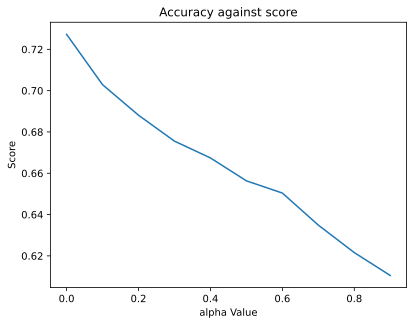

In [68]:
score=[]
alphaVal =[]
for a in arange(0,1,0.1):
    mmodel_tf = naive_bayes.MultinomialNB(alpha=a)
    mmodel_tf.fit(trainXtf,trainY)

    predYtf = mmodel_tf.predict(testXtf)
    accuracy = metrics.accuracy_score(predYtf,testY)
    score.append(accuracy)
    alphaVal.append(a)

plt.title("Accuracy against score")
plt.plot(alphaVal,score)
plt.xlabel("alpha Value")
plt.ylabel("Score")
plt.show()

### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

In [69]:
### INSERT YOUR CODE HERE

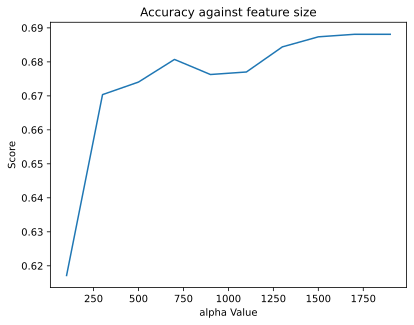

In [70]:
score=[]
fSize =[]
for f in arange(100,2000,200):
    #prepare data with different features
    cntvect2 = feature_extraction.text.CountVectorizer(stop_words="english",max_features=f)
    cntvect2.fit(traindata)
    trainX=cntvect2.transform(traindata)
    testX=cntvect2.transform(testdata)

    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True,norm="l1")
    trainXtf = tf_trans.fit_transform(trainX)
    testXtf= tf_trans.fit_transform(testX)
    trainXtf= trainXtf.toarray()
    testXtf= testXtf.toarray()
    
    #train model with datas
    mmodel_tf = naive_bayes.MultinomialNB(alpha=0.2)
    mmodel_tf.fit(trainXtf,trainY)

    predYtf = mmodel_tf.predict(testXtf)
    accuracy=metrics.accuracy_score(predYtf,testY)
    fSize.append(f)
    score.append(accuracy)


plt.title("Accuracy against feature size")
plt.plot(fSize,score)
plt.xlabel("alpha Value")
plt.ylabel("Score")
plt.show()


From above graph, the vocabulary size at 1500 has the best result.

## Poisson Naive Bayes

Now we will implement a Naive Bayes classifier using a Poisson distribution to model the count of each word appearing in the document.  Recall that the Poisson distribution is:
$$ \mathrm{Poisson}(x,\mu) = \frac{1}{x!}e^{-\mu} \mu^x$$
where $x \in \{0,1,2,\cdots\}$ is a counting number, and $\mu$ is the Poisson mean (arrival rate).

Here is some code showing how to compute the Poisson distribution using scipy.

[[ -1.          -2.          -3.5       ]
 [ -1.          -1.30685282  -2.24723703]
 [ -1.69314718  -1.30685282  -1.68762124]
 [ -2.79175947  -1.71231793  -1.53347056]
 [ -4.17805383  -2.40546511  -1.66700196]
 [ -5.78749174  -3.32175584  -2.0236769 ]
 [ -7.57925121  -4.42036813  -2.5626734 ]
 [ -9.52516136  -5.6731311   -3.25582058]
 [-11.6046029   -7.05942546  -4.08249915]
 [-13.80182748  -8.56350286  -5.02696076]
 [-16.10441257 -10.17294077  -6.07678289]
 [-18.50230785 -11.87768886  -7.22191519]
 [-20.9872145  -13.66944833  -8.45405887]
 [-23.55216385 -15.54125051  -9.76624526]
 [-26.19122118 -17.48716065 -11.15253962]
 [-28.89927138 -19.50206368 -12.60782686]
 [-31.67186011 -21.58150522 -14.12765261]
 [-34.50507345 -23.72157138 -15.70810299]
 [-37.39544521 -25.91879596 -17.34571178]
 [-40.33988419 -28.17008776 -19.03738779]]


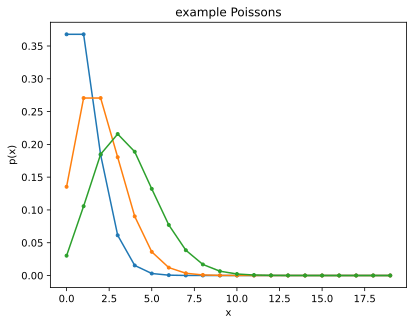

In [103]:
# Poisson distribution
from scipy.stats import poisson

# compute log Poisson(x, lambda)
px = poisson.logpmf(arange(0,20).reshape((20,1)), mu=[[1., 2., 3.5]])

# NOTE: the function respects broadcasting
# x is a column vector, and mu is a row vector
# in the output px, each column is the log Poisson values for one mu
print(px)

# make a plot
plt.title('example Poissons')
plt.plot(arange(0,20), exp(px), '.-')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

Now let's see how to use the Poisson to create a Naive Bayes model. Let $x_i$ be the number of times the i-th word appears in the document. Then we model $x_i$ as a Poisson distribution for each class $c$,
  $$p(x_i|y=c) = \mathrm{Poisson}(x_i, \mu_{i,c})$$
where $\mu_{i, c}$ is the Poisson parameter for the i-th word in the c-th class.  Given the data $\{x_i^{(1)}, \cdots x_i^{(N)}\}$, corresponding the counts of the i-th word in the documents in the c-th class, $\mu_{i,c}$ is estimated as the mean of the data: $\mu_{i,c} = \frac{1}{N} \sum_{n=1}^N x_i^{(n)}$.

Finally, given the document $\mathbf{x} = [x_1,\cdots,x_D]$, the document class-conditional likelihood is:
  $$ p(\mathbf{x}|y=c) = \prod_{i=1}^D p(x_i|y=c) = \prod_{i=1}^D \mathrm{Poisson}(x_i, \mu_{i,c})$$
or CCD log-likelihood is
  $$ \log p(\mathbf{x}|y=c) = \sum_{i=1}^D \log \mathrm{Poisson}(x_i, \mu_{i,c})$$

Write a class for the Poisson Naive Bayes model.  Starting with the `GaussBayes` class from lecture as the template, you only need to change the estimation of the parameters $\mu_{i,c}$ and the computation of the log CCD.

In [72]:
### INSERT YOUR CODE HERE

In [111]:
# multivariate Gaussian functions
from scipy.stats import multivariate_normal as mvn
from scipy.special import logsumexp

class GaussianBayes:
    # constructor: 
    #  alpha is the regularizer on the covariance matrix: Sigma + alpha*I
    def __init__(self, alpha=0.0):
        self.alpha = alpha
    
    # Fit the model: assumes classes are [0,1,2,...K-1]
    # K is the max value in y
    def fit(self, X, y):
        # get the number of classes
        K = max(y)+1
        self.K = K
        
        # estimate mean and covariance
        self.mu = []
        self.Sigma = []
        for c in range(K):
            Xc = X[y==c]   # select samples for this class
            # estimate the mean and covariance
            self.mu.append( mean(Xc, axis=0) )
            self.Sigma.append( cov(Xc, rowvar=False) + self.alpha*eye(len(Xc[0])) )
            
        # estimate class priors
        tmp = []
        for c in range(K):
            tmp.append( count_nonzero(y==c) ) # number of Class c
        self.pi = array(tmp) / len(y)  # divide by the total
    
    # compute the log CCD for class c, log p(x|y=c)
    def compute_logccd(self, X, c):
        #lx = mvn.logpdf(X, mean=self.mu[c], cov=self.Sigma[c],allow_singular=True)
        lx = poisson.logpmf(X,mu=self.mu[c]) # expect shape (n,1) current (n,2000)
        lx= sum(lx,axis=1)
       # print(lx.shape)
        return lx
    
    # compute the joint log-likelihood: log p(x,y)
    def compute_logjoint(self, X):
        # compute log joint likelihood: log p(x|y) + log p(y)
        jl = []
        for c in range(self.K):
            jl.append( self.compute_logccd(X, c) + log(self.pi[c]) )
        
        # p[i,c] = log p(X[i]|y=c)
        p = stack( jl, axis=-1 )
        return p
        
    # compute the posterior log-probability of each class given X
    def predict_logproba(self, X):        
        lp = self.compute_logjoint(X)  # compute joint loglikelihoods
        lpx = logsumexp(lp, axis=1)    # compute log p(x) = log sum_c exp( log p(x,y))
        return lp - lpx[:,newaxis]     # compute log posterior: log p(y|x) = log p(x,y) - log p(x)
    
    # compute the posterior probability of each class given X
    def predict_proba(self, X):
        return exp( self.predict_logproba(X) )
    
    # compute the most likely class given X
    def predict(self, X):
        lp = self.compute_logjoint(X)   # compute joint likelihoods
        c = argmax(lp, axis=1)          # find the maximum
        return c    

Now test your Poisson NB model on the Newsgroup dataset.

In [74]:
### INSERT YOUR CODE HERE

In [81]:
# prepare data
cntvect = feature_extraction.text.CountVectorizer(stop_words="english",max_features=2000)
cntvect.fit(traindata)
trainX=cntvect.transform(traindata)
testX=cntvect.transform(testdata)

tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True,norm="l1")
trainXtf = tf_trans.fit_transform(trainX)
testXtf= tf_trans.fit_transform(testX)
trainXtf = trainXtf.toarray()
testXtf = testXtf.toarray()

print(trainXtf.shape)
print(testXtf.shape)

(2034, 2000)
(1353, 2000)


In [114]:
pnb = GaussianBayes(alpha=0.2)
pnb.fit(trainXtf,trainY)
print(trainXtf.shape, trainY.shape)
print(array(pnb.mu).shape)
print(testXtf.shape)
predYPnb = pnb.predict(testXtf) 
res = metrics.accuracy_score(predYPnb,testY)
print(res)

(2034, 2000) (2034,)
(4, 2000)
(1353, 2000)
0.24168514412416853


How does the Poisson NB model compare with the other models that you tested?  Is this a good model for documents?

- **INSERT YOUR ANSWER HERE**

The result from the poission NB model is much lower than the above the model. As such, this is not a good model for documents.